<a href="https://colab.research.google.com/github/anjunjin/PFE-ING3-IA/blob/master/camemBERT_preds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/PFE/"
df = pd.read_csv(DATA_PATH+"Tweets_nettoyés_050422_avecemoji.csv", encoding='utf-8').drop(['Unnamed: 0'], axis=1)

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df = df.dropna()

In [ ]:
dfFiables = df.loc[df['liability'] == 0].sample(n=25000, replace=False)
dfPasFiables = df.loc[df['liability'] == 1].sample(n=25000, replace=False)
df = pd.concat([dfFiables,dfPasFiables])

In [ ]:
df

,liability,liability_label,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,tagged
345786,0,site plutôt fiable,le_Parisien,13.0,26.0,2981828.0,Les sondages d’intention de vote sont très fav...,sondages ’intention vote favorables emmanuel m...,Les_DET sondages_NOUN d’_ADP intention_NOUN de...
397746,0,site plutôt fiable,larep_fr,0.0,1.0,24787.0,Parrainage : pourquoi un maire ne peut organis...,parrainage maire organiser tirage sort consult...,Parrainage_NOUN :_PUNCT pourquoi_ADV un_DET ma...
438787,0,site plutôt fiable,lestrepublicain,2.0,1.0,102373.0,🚅 Voici les lignes #TER de Bourgogne Franche-C...,🚅 lignes bourgogne franchecomté ouvertes concu...,🚅_PROPN Voici_VERB les_DET lignes_NOUN #_ADJ T...
517579,0,site plutôt fiable,charentelibre,0.0,0.0,12597.0,#Dordogne: une femme grièvement blessée par de...,femme grièvement blessée chiens desident_link ...,#_NOUN Dordogne_PROPN :_PUNCT une_DET femme_NO...
243304,0,site plutôt fiable,Rue89,11.0,11.0,1536918.0,"Le député François Ruffin émet 6,3 tonnes d’éq...",député françois ruffin émet desident_number to...,Le_DET député_NOUN François_PROPN Ruffin_PROPN...
...,...,...,...,...,...,...,...,...,...
622368,1,site plutôt douteux,Letribunaldunet,0.0,0.0,17067.0,Inventing Anna : l'ancienne meilleure amie de ...,inventing anna lancienne meilleure amie larnaq...,Inventing_VERB Anna_NOUN :_PUNCT l'_DET ancien...
574805,1,site plutôt douteux,tvlofficiel,34.0,0.0,112057.0,RT @BildMartial: Parce que c’est la France 🇫🇷 ...,rt ’est france 🇫🇷 aimons belle sincère périple...,RT_NOUN @BildMartial_PROPN :_PUNCT Parce_SCONJ...
673071,1,site plutôt douteux,InfoMdia,0.0,0.0,5644.0,Grandes figures du scoutisme (Christophe Caric...,grandes figures scoutisme christophe carichon ...,Grandes_ADJ figures_NOUN du_DET scoutisme_NOUN...
5293,1,site plutôt douteux,llp_le_vrai,119.0,215.0,51389.0,"""Elle ne peut plus se lever de son lit, ni bou...",lever lit bouger marcher souffre douleurs jamb...,"""_PUNCT Elle_PRON ne_ADV peut_AUX plus_ADV se_..."


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,liability,liability_label,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,tagged
0,1,site plutôt douteux,france_soir,3.0,11.0,126112.0,"🎙️ ""Un Corse indépendantiste, c’est à la base ...",🎙️ corse indépendantiste ’est base humaniste i...,"🎙_NOUN ️_ADJ ""_PUNCT Un_DET Corse_PROPN indépe..."
1,1,site plutôt douteux,france_soir,8.0,31.0,126112.0,🍄 La start-up Mycophyto propose d’enrichir le...,🍄 startup mycophyto propose ’enrichir sol plan...,🍄_PROPN _SPACE La_DET start_NOUN -_PUNCT up_X...
2,1,site plutôt douteux,france_soir,54.0,85.0,126112.0,📽 Dans un debriefing exclusif conduit avec Ari...,📽 debriefing exclusif conduit ariane bilheran ...,📽_PROPN Dans_ADP un_DET debriefing_NOUN exclus...
3,1,site plutôt douteux,france_soir,21.0,36.0,126112.0,⚠️ Le conflit #UkraineRussie créant à la fois ...,⚠️ conflit créant fois panique entraide escroc...,⚠_PROPN ️_VERB Le_DET conflit_NOUN #_ADJ Ukrai...
4,1,site plutôt douteux,france_soir,213.0,350.0,126112.0,"🖍️ Le dessin du jour sur #McKinseyGate, par Z_...",🖍️ dessin jour z_caricature retrouver desident...,🖍_NOUN ️_ADV Le_DET dessin_NOUN du_DET jour_NO...
...,...,...,...,...,...,...,...,...,...
759385,0,site plutôt fiable,wikiHow,0.0,2.0,73816.0,"Remember, remember, the 5th of November. https...",remember remember the desident_number th of no...,"Remember_PROPN ,_PUNCT remember_PROPN ,_PUNCT ..."
759386,0,site plutôt fiable,wikiHow,1.0,6.0,73816.0,#wikitips https://t.co/dzc5wobrmx https://t.co...,desident_link desident_link,#_NOUN wikitips_PROPN https://t.co/dzc5wobrmx_...
759387,0,site plutôt fiable,wikiHow,0.0,6.0,73816.0,#wikitips https://t.co/g7Lg8EjTlm https://t.co...,desident_link desident_link,#_NOUN wikitips_PROPN https://t.co/g7Lg8EjTlm_...
759388,0,site plutôt fiable,wikiHow,5.0,12.0,73816.0,"Thanks for this, @MichaelDapaah https://t.co/M...",thanks for this desident_link,"Thanks_X for_X this_X ,_PUNCT @MichaelDapaah_P..."


In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 14.7 MB/s 
     |████████████████████████████████| 895 kB 68.5 MB/s 
     |████████████████████████████████| 6.6 MB 56.3 MB/s 
     |████████████████████████████████| 596 kB 78.2 MB/s 
     |████████████████████████████████| 77 kB 8.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install SentencePiece

     |████████████████████████████████| 1.2 MB 16.1 MB/s 


In [ ]:
# Importing standard libraries for every machine/deep learning pipeline
import pandas as pd
import torch
from tqdm import tqdm, trange
import numpy as np


# Importing specific libraries for data prerpcessing, model archtecture choice, training and evaluation
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import CamembertTokenizer, CamembertForSequenceClassification
from transformers import AdamW
# import torch.optim as optim
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import seaborn as sns

In [ ]:
# Defining constants
epochs = 4
MAX_LEN = 128
batch_size = 16
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Initialize CamemBERT tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base',do_lower_case=True)

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

In [ ]:
df = df[df.apply(lambda x: True if not x['cleaned'].isspace() else False,axis=1)]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df['liability'] = df['liability'].astype(int)

In [ ]:
for i in df['liability']:
  if isinstance(i, str):
    print(type(i))


In [ ]:
# Creates list of texts and labels
text = df['cleaned'].to_list()
labels = df['liability'].to_list()

#user tokenizer to convert sentences into tokenizer
input_ids  = [tokenizer.encode(sent,add_special_tokens=True,max_length=MAX_LEN) for sent in text]

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]  
    attention_masks.append(seq_mask)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
# Usehttps://www.google.com/search?q=FreeSaDa+sarcastic+dataset&client=ubuntu&hs=cgI&channel=fs&ei=K0w4Yq7JJouLlwS-gKLwBw&ved=0ahUKEwjuipPC-Nb2AhWLxYUKHT6ACH4Q4dUDCA0&uact=5&oq=FreeSaDa+sarcastic+dataset&gs_lcp=Cgdnd3Mtd2l6EAMyBwghEAoQoAEyBAghEBU6BQghEKABSgQIQRgBSgQIRhgAUJQCWNMkYPokaANwAHgAgAHOAYgB-haSAQYwLjE4LjGYAQCgAQHAAQE&sclient=gws-wiz train_test_split to split our data into train and validation sets for training
train_inputs, test_inputs, train_labels, test_labels, train_masks, test_masks = train_test_split(input_ids, labels, attention_masks,
                                                            random_state=42, test_size=0.2)
# 80% dataset(train) : 80%*0.75=60% train  80%*0.25=20% test
train_inputs, validation_inputs, train_labels, validation_labels,train_masks, validation_masks = train_test_split(train_inputs, train_labels,train_masks, test_size=0.25, random_state=42)
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
test_inputs = torch.tensor(test_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
test_masks = torch.tensor(test_masks)
validation_masks = torch.tensor(validation_masks)

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 
model = CamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=2)
model.to(device)

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForSequenceClassification: ['lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 

CamembertForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32005, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (Laye

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5, eps=10e-8)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
# Store our loss and accuracy for plotting if we want to visualize training evolution per epochs after the training process
train_loss_set = []
train_acc_set = []
test_loss_set = []
test_acc_set = []
eval_loss_set = []
eval_acc_set = []
# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):  
    # Tracking variables for training
    tr_loss = 0
    tr_accuracy = 0
    nb_tr_examples, nb_tr_steps = 0, 0
  
    # Train the model
    model.train()
    for step, batch in enumerate(train_dataloader):
        # Add batch to device CPU or GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        outputs = model(b_input_ids,token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        # Get loss value
        loss = outputs[0]
        # Add it to train loss list
        #train_loss_set.append(loss.item())    
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
    
        # Update tracking variables
        logits = outputs[1]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tr_loss += loss.item()
        tmp_tr_accuracy = flat_accuracy(logits, label_ids)
        tr_accuracy += tmp_tr_accuracy
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1
        
    train_loss_set.append(tr_loss/nb_tr_steps)
    train_acc_set.append(100*tr_accuracy/nb_tr_steps)
    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
    


    # Tracking variables for test
    test_loss, test_accuracy = 0, 0
    nb_test_steps, nb_test_examples = 0, 0
    # Validation of the model
    model.eval()
    # Evaluate data for one epoch
    for batch in test_dataloader:
        # Add batch to device CPU or GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions
            outputs =  model(b_input_ids,token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
            loss, logits = outputs[:2]
    
        # Move logits and labels to CPU if GPU is used
        test_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_test_accuracy = flat_accuracy(logits, label_ids)
    
        test_accuracy += tmp_test_accuracy
        nb_test_steps += 1

    test_loss_set.append(test_loss/nb_test_steps)
    test_acc_set.append(100*test_accuracy/nb_test_steps)
    print("test Accuracy: {}".format(test_accuracy/nb_test_steps))

    # Tracking variables for validation
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    # Validation of the model
    model.eval()
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        # Add batch to device CPU or GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions
            outputs =  model(b_input_ids,token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
            loss, logits = outputs[:2]
    
        # Move logits and labels to CPU if GPU is used
        eval_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    eval_loss_set.append(eval_loss/nb_eval_steps)
    eval_acc_set.append(100*eval_accuracy/nb_eval_steps)
    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 0.6163486713158028
test Accuracy: 0.6955146774816531


Epoch:  25%|██▌       | 1/4 [3:11:18<9:33:56, 11478.79s/it]

Validation Accuracy: 0.6946126970750377
Train loss: 0.6162267561034713
test Accuracy: 0.6955146774816531


Epoch:  50%|█████     | 2/4 [6:21:06<6:20:50, 11425.48s/it]

Validation Accuracy: 0.6946126970750377


In [ ]:
from datetime import datetime
import os

In [ ]:
# datetime object containing current date and time
time = datetime.now().strftime("%d_%m_%Y_%H_%M_%S")


In [ ]:
print(time)

02_02_2022_17_17_17


In [ ]:
res_folder = "/content/drive/My Drive/PFE/Modele_camembert50KAvecemoji/"+time
if not os.path.exists(res_folder):
  os.mkdir(res_folder)
torch.save(model.state_dict(), res_folder+"/model_saved")

In [ ]:
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 
model = CamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=2)
model.to(device)

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.out_proj.bias

CamembertForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32005, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (Laye

In [ ]:
charger_le_modele_enregistre = True
model_path = "/content/drive/My Drive/PFE/Modele_camembert50KAvecemoji/19_04_2022_10_40_24/model_saved"

if charger_le_modele_enregistre:
  model.load_state_dict(torch.load(model_path))

  

In [ ]:
def softmax(x):   
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x*100

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,liability,liability_label,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,tagged
345786,0,site plutôt fiable,le_Parisien,13.0,26.0,2981828.0,Les sondages d’intention de vote sont très fav...,sondages ’intention vote favorables emmanuel m...,Les_DET sondages_NOUN d’_ADP intention_NOUN de...
397746,0,site plutôt fiable,larep_fr,0.0,1.0,24787.0,Parrainage : pourquoi un maire ne peut organis...,parrainage maire organiser tirage sort consult...,Parrainage_NOUN :_PUNCT pourquoi_ADV un_DET ma...
438787,0,site plutôt fiable,lestrepublicain,2.0,1.0,102373.0,🚅 Voici les lignes #TER de Bourgogne Franche-C...,🚅 lignes bourgogne franchecomté ouvertes concu...,🚅_PROPN Voici_VERB les_DET lignes_NOUN #_ADJ T...
517579,0,site plutôt fiable,charentelibre,0.0,0.0,12597.0,#Dordogne: une femme grièvement blessée par de...,femme grièvement blessée chiens desident_link ...,#_NOUN Dordogne_PROPN :_PUNCT une_DET femme_NO...
243304,0,site plutôt fiable,Rue89,11.0,11.0,1536918.0,"Le député François Ruffin émet 6,3 tonnes d’éq...",député françois ruffin émet desident_number to...,Le_DET député_NOUN François_PROPN Ruffin_PROPN...
...,...,...,...,...,...,...,...,...,...
622368,1,site plutôt douteux,Letribunaldunet,0.0,0.0,17067.0,Inventing Anna : l'ancienne meilleure amie de ...,inventing anna lancienne meilleure amie larnaq...,Inventing_VERB Anna_NOUN :_PUNCT l'_DET ancien...
574805,1,site plutôt douteux,tvlofficiel,34.0,0.0,112057.0,RT @BildMartial: Parce que c’est la France 🇫🇷 ...,rt ’est france 🇫🇷 aimons belle sincère périple...,RT_NOUN @BildMartial_PROPN :_PUNCT Parce_SCONJ...
673071,1,site plutôt douteux,InfoMdia,0.0,0.0,5644.0,Grandes figures du scoutisme (Christophe Caric...,grandes figures scoutisme christophe carichon ...,Grandes_ADJ figures_NOUN du_DET scoutisme_NOUN...
5293,1,site plutôt douteux,llp_le_vrai,119.0,215.0,51389.0,"""Elle ne peut plus se lever de son lit, ni bou...",lever lit bouger marcher souffre douleurs jamb...,"""_PUNCT Elle_PRON ne_ADV peut_AUX plus_ADV se_..."


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
def predict(sentence_id):
  print(sentence_id)
  vector = pad_sequences([tokenizer.encode(tokenizer.tokenize(df['cleaned'][sentence_id]),add_special_tokens=True,max_length=MAX_LEN,truncation=True)], maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")[0]
  mask = torch.Tensor([[float(i>0) for i in vector]]).to(device)
  input_vector  = torch.tensor([vector]).to(device)
  outputs = model.forward(input_vector, mask)
  logits = outputs['logits'].detach().cpu().numpy() 
  return np.argmax(logits, axis=1)

df["predictions"] = [predict(i) for i in range(df.shape[0])]
pd.set_option('display.max_rows', None)

0
1
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  """


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
45000
45001
45002
45003
45004
45005
45006
45007
45008
45009
45010
45011
45012
45013
45014
45015
45016
45017
45018
45019
45020
45021
45022
45023
45024
45025
45026
45027
45028
45029
45030
45031
45032
45033
45034
45035
45036
45037
45038
45039
45040
45041
45042
45043
45044
45045
45046
45047
45048
45049
45050
45051
45052
45053
45054
45055
45056
45057
45058
45059
45060
45061
45062
45063
45064
45065
45066
45067
45068
45069
45070
45071
45072
45073
45074
45075
45076
45077
45078
45079
45080
45081
45082
45083
45084
45085
45086
45087
45088
45089
45090
45091
45092
45093
45094
45095
45096
45097
45098
45099
45100
45101
45102
45103
45104
45105
45106
45107
45108
45109
45110
45111
45112
45113
45114
45115
45116
45117
45118
45119
45120
45121
45122
45123
45124
45125
45126
45127
45128
45129
45130
45131
45132
45133
45134
45135
45136
45137
45138
45139
45140
45141
45142
45143
45144
45145
45146
45147
45148
45149
45150
45151
45152
4515

numpy.int64

In [ ]:
def predict_text(sentence):
  vector = pad_sequences([tokenizer.encode(tokenizer.tokenize(sentence),add_special_tokens=True,max_length=MAX_LEN,truncation=True)], maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")[0]
  mask = torch.Tensor([[float(i>0) for i in vector]]).to(device)
  input_vector  = torch.tensor([vector]).to(device)
  outputs = model2.forward(input_vector, mask)
  logits = outputs.detach().cpu().numpy()
  vals = softmax(logits)
  return [i+" : "+str(int(j))+" %" for i,j in zip(map, vals[0])]



In [ ]:
df.head(10)

,liability,liability_label,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,tagged,predictions
0,0,site plutôt fiable,humanite_fr,6.0,9.0,387951.0,"4 ans après #MeToo, les féministes tentent, ta...",desident_number ans féministes tentent mal fai...,"4_NUM ans_NOUN après_ADP #_NOUN MeToo_PROPN ,_...",[1]
1,0,site plutôt fiable,causeur,2.0,8.0,64290.0,"🇵🇱 ""Le pays se barricade. Contre les menaces t...",desident_emot_poland pays barricade menaces te...,"🇵_PROPN 🇱_PROPN ""_PUNCT Le_DET pays_NOUN se_PR...",[1]
2,0,site plutôt fiable,Reuters,43.0,195.0,24875825.0,Texas man pleads guilty to assaulting police a...,texas man pleads guilty to assaulting police a...,Texas_NOUN man_PROPN pleads_X guilty_X to_X as...,[1]
3,0,site plutôt fiable,FigaroVox,10.0,21.0,29369.0,«Honneur aux deux légionnaires blessés en seco...,«honneur légionnaires blessés secourant victim...,«_DET Honneur_NOUN aux_ADP deux_NUM légionnair...,[1]
4,0,site plutôt fiable,conspiration,9.0,0.0,51995.0,RT @mauriceronai: Comment Wikipédia a fait fac...,rt wikipédia face torrent théories complotiste...,RT_PROPN @mauriceronai_PROPN :_PUNCT Comment_A...,[1]
5,0,site plutôt fiable,DebunkerHED,0.0,1.0,3847.0,@CitoyenLyon9 @AgagBoudjahlat Parce que tu tro...,trouves harcèlement cest,@CitoyenLyon9_NOUN @AgagBoudjahlat_PROPN Parce...,[1]
6,0,site plutôt fiable,laprovence,1.0,1.0,272094.0,La commission détient suffisamment d'éléments ...,commission détient suffisamment déléments conc...,La_DET commission_PROPN détient_VERB suffisamm...,[1]
7,0,site plutôt fiable,Le_Progres,1.0,2.0,170487.0,"Fabien #Roussel ""face aux électeurs"" du groupe...",fabien face électeurs groupe ebra desident_dat...,"Fabien_NOUN #_PROPN Roussel_PROPN ""_PUNCT face...",[1]
8,0,site plutôt fiable,TETUmag,1.0,0.0,70656.0,RT @thierrydabo: Stand-up : @Hannahgadsby anno...,rt standup annonce date paris spectacle deside...,RT_X @thierrydabo_PROPN :_PUNCT Stand_X -_PUNC...,[0]
9,0,site plutôt fiable,mediapart,12.0,0.0,2872051.0,RT @AmeliePoinssot: [INFOS @Mediapart] \nLes é...,rt infos élevages maître coq touchés productio...,RT_X @AmeliePoinssot_PROPN :_PUNCT [_PUNCT INF...,[0]


In [ ]:
for i in range(df.shape[0]):
  df['predictions'][i] = df['predictions'][i][0]
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head(100)

,liability,liability_label,description,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,parsed,predictions
0,1,site plutôt douteux,Un fil d'actualité sur Twitter animé par des j...,actu140,0.0,0.0,65236.0,"🟥RATP-Grève: Pour aujourd’hui, 3 lignes de mét...",🟥ratpgrève aujourd’hui desident_number lignes ...,🟥ratpgrève aujourd’hui desident_number lignes ...,1
1,0,site plutôt fiable,L'une des principales agences de presse généra...,Reuters,23.0,36.0,24049259.0,Regeneron's COVID-19 antibody drug may be less...,regenerons covid19 antibody drug may be less e...,regenerons covid19 antibody drug may be less e...,0
2,1,site plutôt douteux,Un site Internet qui relaie parfois des inform...,UnleashMind,0.0,0.0,13813.0,Is Trump sanctioning the sky now?\nhttps://t.c...,is trump sanctioning the sky now desident_link,is trump sanctioning the sky now desident_link,1
3,0,site plutôt fiable,Une plateforme participative qui n'est pas ori...,agoravox,3.0,0.0,15974.0,"RT @Phocida: De déboisement en déforestation, ...",rt phocida déboisement déforestation désastre ...,rt phocida déboisement déforestation désastre ...,0
4,0,site plutôt fiable,Chaîne de télévision publique généraliste fran...,France5tv,15.0,22.0,640674.0,Il était une flûte qui se faisait comprendre d...,flûte faisait comprendre enchantait royaume cé...,flûte faisait comprendre enchantait royaume cé...,0
5,0,site plutôt fiable,"Attention, il ne s'agit pas d'articles de « L'...",LePlus,20.0,12.0,30815.0,Mon fils est autiste : la France ne lui offre ...,fils autiste france offre avenir desident_link...,fils autiste france offre avenir desident_link...,0
6,0,site plutôt fiable,Un des principaux quotidiens d'information bri...,guardian,12.0,79.0,10039038.0,Queen attends Windsor christening after absenc...,queen attends windsor christening after absenc...,queen attends windsor christening after absenc...,0
7,0,site plutôt fiable,Acrimed (Action critique médias) est une assoc...,acrimed_info,138.0,0.0,83468.0,RT @acrimed_info: [Relire] Entretien avec @DuA...,rt acrimed_info relire entretien duaccident pr...,rt acrimed_info relire entretien duaccident pr...,0
8,0,site plutôt fiable,9gag n'est pas une source d'information en soi...,9GAG,126.0,718.0,16853307.0,Too real\nhttps://t.co/4BfbOMb2HA,too real desident_link,too real desident_link,0
9,0,site plutôt fiable,Un site Internet consacré au bien-être et à la...,doctissimo,0.0,1.0,28171.0,Son usage se généralise à travers le monde: po...,usage généralise travers monde pourtant autori...,usage généralise travers monde pourtant autori...,0


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

confusion_matrix = pd.crosstab(df['liability'], df['predictions'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, xticklabels=confusion_matrix, yticklabels=confusion_matrix)
plt.title('Heatmap of topics')
plt.xlabel('predictions')
plt.ylabel('labels')
plt.show()

TypeError: ignored

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
mcc = matthews_corrcoef(list(df['liability']), list(df['predictions']))

In [ ]:
mcc

0.44146156639749934

In [ ]:
plt.plot(train_acc_set,'-o')
plt.plot(test_acc_set,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim(0,15)
plt.legend(['Train','test'])
plt.title('Train vs Valid Accuracy')
plt.show()

NameError: ignored

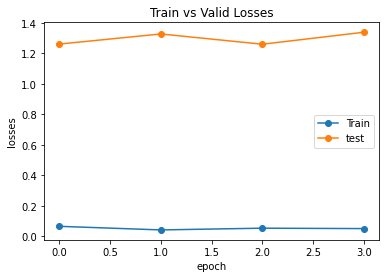

In [ ]:
plt.plot(train_loss_set,'-o')
plt.plot(test_loss_set,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','test'])
plt.title('Train vs Valid Losses')
plt.show()